## Importing Necessary Libraries 

In [5]:
import numpy as np
import pandas as pd
import string
import os 
import matplotlib.pyplot as plt
import seaborn as sns

import ipywidgets
from ipywidgets import interact

plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

In [7]:
# reading the Dataset
data = pd.read_csv('drug.csv')

# lets print the shape of the dataset
print("The Shape of the Dataset :", data.shape)

The Shape of the Dataset : (161297, 7)


In [8]:
# lets check the head of the dataset
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [9]:
# lets Explore Some of the Important Column in the dataset

print("Number of Unique Drugs present in the Dataset :", data['drugName'].nunique())
print("Number of Unique Medical Conditions present in the Dataset :", data['condition'].nunique())

print("\nThe Time Period of Collecting the Data")
print("Starting Date :", data['date'].min())
print("Ending Date :", data['date'].max())

Number of Unique Drugs present in the Dataset : 3436
Number of Unique Medical Conditions present in the Dataset : 884

The Time Period of Collecting the Data
Starting Date : 1-Apr-08
Ending Date : 9-Sep-17


### Summarizing the Dataset

In [10]:
# lets summarize the Dataset
data[['rating','usefulCount']].describe()

,rating,usefulCount
count,161297.000000,161297.000000
mean,6.994377,28.004755
std,3.272329,36.403742
min,1.000000,0.000000
25%,5.000000,6.000000
50%,8.000000,16.000000
75%,10.000000,36.000000
max,10.000000,1291.000000


In [11]:
# lets check the Number and Name of the Drugs with 0 Useful Count in Details
print("Analysis on Useless Drugs")
print("----------------------------")
print("The Number of Drugs with No Useful Count :", data[data['usefulCount'] == 0].count()[0])

# Lets Check the Number of Drugs with No Usesful Count with Review Greater than or Equal to 8
print("Number of Good Drugs with Lesser Useful Count :", data[(data['usefulCount'] == 0) &
                                                data['rating'] >= 8].count()[0])

# Lets Check the Average Rating of the Drugs with No Useful Count
print("Average Rating of Drugs with No Useful Count : {0:.2f}".format(data[data['usefulCount'] == 0]['rating'].mean()))

print("\nAnalysis on Useful Drugs")
print("----------------------------")
print("The Number of Drugs with Greater than 1000 Useful Counts :", data[data['usefulCount'] > 1000].count()[0])
print("Average Rating of Drugs with 1000+ Useful Counts :", data[data['usefulCount'] > 1000]['rating'].mean())
print("\nName and Condition of these Drugs: \n\n", 
    data[data['usefulCount'] > 1000][['drugName','condition']].reset_index(drop = True))

Analysis on Useless Drugs
----------------------------
The Number of Drugs with No Useful Count : 6318
Number of Good Drugs with Lesser Useful Count : 0
Average Rating of Drugs with No Useful Count : 5.80

Analysis on Useful Drugs
----------------------------
The Number of Drugs with Greater than 1000 Useful Counts : 4
Average Rating of Drugs with 1000+ Useful Counts : 10.0

Name and Condition of these Drugs: 

          drugName      condition
0          Mirena  Birth Control
1      Sertraline     Depression
2  Levonorgestrel  Birth Control
3          Zoloft     Depression


In [12]:
# lets summarize Categorical data also
data[['drugName','condition','review']].describe(include = 'object')

,drugName,condition,review
count,161297,160398,161297
unique,3436,884,112329
top,Levonorgestrel,Birth Control,"""Good"""
freq,3657,28788,33


In [13]:
# lets check for Missing Values
data.isnull().sum()

uniqueID         0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [14]:
# as we know that condition is an Important Column, so we will delete all the records where Condition is Missing
data = data.dropna()

# lets check the Missing values now
data.isnull().sum().sum()

0

### Unveiling Hidden Patterns from the Data

/Users/elbrusgasimov/.conda/envs/pythonProject2/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/elbrusgasimov/.conda/envs/pythonProject2/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


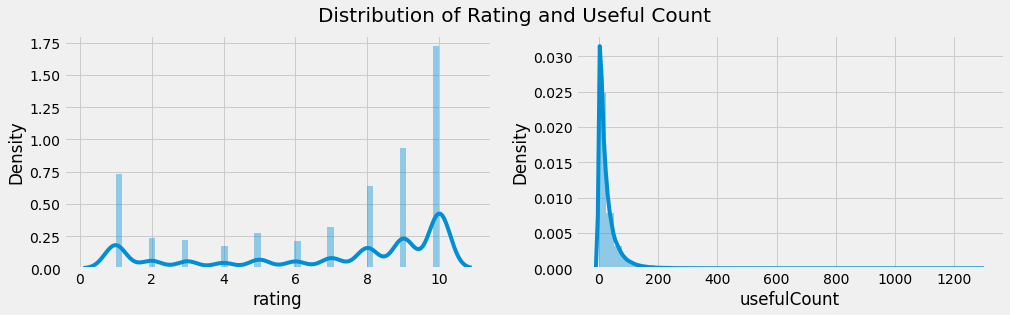

In [15]:
# lets check the Distribution of Rating and Useful Count

plt.rcParams['figure.figsize'] = (15, 4)

plt.subplot(1, 2, 1)
sns.distplot(data['rating'])

plt.subplot(1, 2, 2)
sns.distplot(data['usefulCount'])

plt.suptitle('Distribution of Rating and Useful Count \n ', fontsize = 20)
plt.show()

/Users/elbrusgasimov/.conda/envs/pythonProject2/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


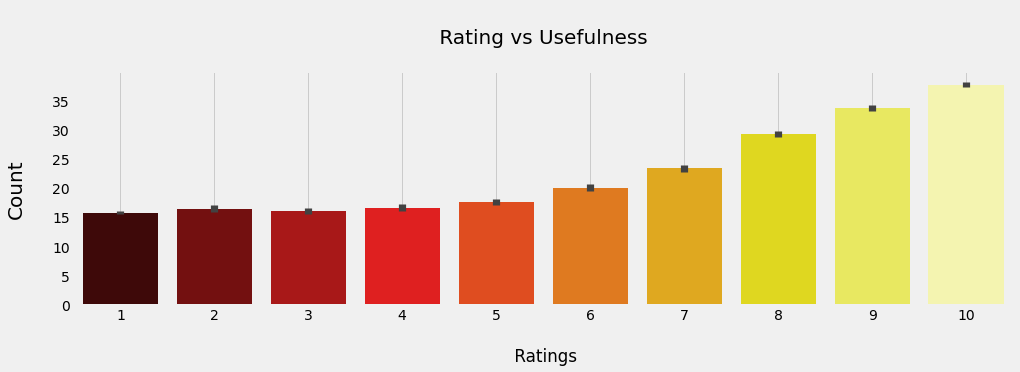

In [16]:
# lets check the Impact of Ratings on Usefulness

plt.rcParams['figure.figsize'] = (15, 4)
sns.barplot(data['rating'], data['usefulCount'], palette = 'hot')
plt.grid()
plt.xlabel('\n Ratings')
plt.ylabel('Count\n', fontsize = 20)
plt.title('\n Rating vs Usefulness \n', fontsize = 20)
plt.show()

In [17]:
# Checking whether Length of Review has any Impact on Ratings of the Drugs

# for that we need to create a new column to calculate length of the reviews
data['len']  = data['review'].apply(len)

In [18]:
# lets check the Impact of Length of Reviews on Ratings
data[['rating','len']].groupby(['rating']).agg(['min','mean','max'])

len                   
       min        mean    max
rating                       
1        5  428.784505   3692
2        9  452.902893  10787
3        8  461.249961   5112
4        7  464.077912   3030
5        6  477.982661   2048
6        4  467.957150   2202
7        6  485.597765   3063
8        3  483.584163   4087
9        3  477.696117   6182
10       3  443.215923   6192

In [19]:
# lets check the Highest Length Review
print("Length of Longest Review", data['len'].max())
data['review'][data['len'] == data['len'].max()].iloc[0]

Length of Longest Review 10787


'"Two and a half months ago I was prescribed Venlafaxine to help prevent chronic migraines.\r\nIt did help the migraines (reduced them by almost half), but with it came a host of side effects that were far worse than the problem I was trying to get rid of.\r\nHaving now come off of the stuff, I would not recommend anyone ever use Venlafaxine unless they suffer from extreme / suicidal depression. I mean extreme in the most emphatic sense of the word. \r\nBefore trying Venlafaxine, I was a writer. While on Venlafaxine, I could barely write or speak or communicate at all. More than that, I just didn&#039;t want to. Not normal for a usually outgoing extrovert.\r\nNow, I&#039;m beginning to write again - but my ability to speak and converse with others has deteriorated by about 95%. Writing these words is taking forever; keeping up in conversation with even one person is impossible, and I barely see the point of trying either. On Venlafaxine, words pretty much left me - my conversational vo